# Анализ данных о продажах компьютерных игр для интернет-магазина "Стримчик".

В условиях быстро меняющегося рынка компьютерных игр интернет-магазин "Стримчик" стоит перед задачей определения успешных трендов и планирования рекламных кампаний на предстоящий 2017 год. Мы имеем доступ к историческим данным о продажах, оценках критиков и пользователей, а также информации о платформах и жанрах игр. Проект направлен на выявление закономерностей и факторов, влияющих на успешность игр, чтобы эффективно адаптировать стратегии продаж и маркетинга. Основная цель - разработать рекомендации для оптимизации ассортимента и увеличения прибыльности магазина "Стримчик".


План работ:

1. Подготовка данных:
* Замена названий столбцов и приведение к нижнему регистру.
* Преобразование данных в нужные типы.
* Обработка пропусков.
* Обработка аббревиатуры 'tbd' в столбце с оценкой пользователей.
* Расчет суммарных продаж во всех регионах и запись их в отдельный столбец.

2. Исследовательский анализ данных:
* Анализ количества выпущенных игр в разные годы.
* Изучение изменений продаж по платформам.
* Определение актуального периода для анализа (учет только данных за последние годы).
* Определение лидирующих по продажам платформ и их трендов.
* Построение графика «ящик с усами» по глобальным продажам игр.
* Анализ влияния отзывов пользователей и критиков на продажи.
* Определение распределения игр по жанрам и выявление прибыльных жанров.

3. Составление портрета пользователя каждого региона:
* Определение самых популярных платформ и жанров в регионах NA, EU, JP.
* Анализ влияния рейтинга ESRB на продажи в отдельных регионах.

4. Проверка гипотез:
* Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
* Проверка гипотезы о различии средних пользовательских рейтингов жанров Action и Sports.


# Ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Краткое описание данных**

Набор данных содержит информацию о продажах компьютерных игр, выпущенных до 2016 года. Датасет включает 16715 записей и 11 столбцов.

Столбцы:
* Name: Название игры.
* Platform: Платформа, на которой выпущена игра.
* Year_of_Release: Год выпуска игры.
* Genre: Жанр игры.
* NA_sales: Продажи в Северной Америке (в миллионах копий).
* EU_sales: Продажи в Европе (в миллионах копий).
* JP_sales: Продажи в Японии (в миллионах копий).
* Other_sales: Продажи в других регионах (в миллионах копий).
* Critic_Score: Оценка критиков (максимум 100).
* User_Score: Оценка пользователей.
* Rating: Рейтинг от Entertainment Software Rating Board (ESRB).

# Предобработка данных

In [5]:
data.columns = ['name', 'platform','release_year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data['release_year'] = data['release_year'].astype('Int64')
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'] = data['user_score'].astype(float)

In [7]:
data.isna().sum()

name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

In [8]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19, 6), legend=False, fontsize=16, color='SteelBlue')
        );
        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='Black')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками', fontsize=22)
        plt.xlim(0, 100)  # Установка шкалы от 0 до 100
    except:
        print('Пропусков не осталось :) или произошла ошибка в первой части функции ')

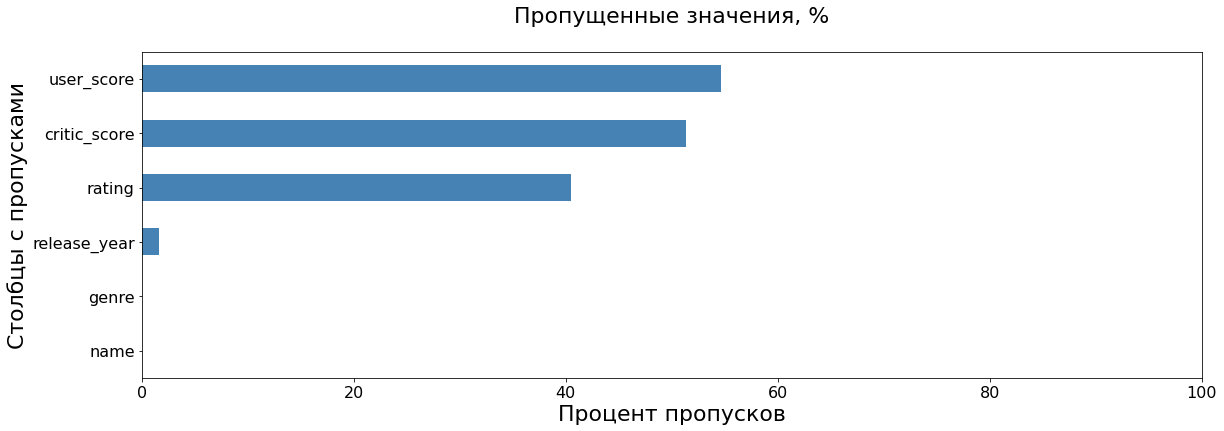

In [9]:
pass_value_barh(data)

In [10]:
#data['name'] = data['name'].fillna('Unknown') 
#data['genre'] = data['genre'].fillna('Unknown') 
data['rating'] = data['rating'].fillna('Unknown') 

In [11]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [12]:
data.duplicated().sum()

0

In [13]:
data[data.duplicated(subset=['name','platform','release_year','genre'], keep='first')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,Unknown,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E,0.01


In [14]:
data = data.drop_duplicates(subset=['name','platform','release_year','genre'])

In [15]:
rows_with_nan = data[data['user_score'].isna()]
data.sort_values(by='na_sales', ascending=False)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
...,...,...,...,...,...,...,...,...,...,...,...,...
11730,Tales of Fandom Vol.2,PS2,2007,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,Unknown,0.08
11729,One Piece: Gear Spirit,DS,2007,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,Unknown,0.08
11718,Fate/Tiger Colosseum,PSP,2007,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,Unknown,0.08
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


 **Предобработка данных. Краткий вывод**

В процессе предобработки данных были выполнены следующие шаги:

* Приведение названий столбцов к нижнему регистру для улучшения удобства работы с данными.
* Изменение типов данных для столбцов `release_year` и `user_score` на Int64 и float соответственно, чтобы они соответствовали своей природе.
* Обнаружено, что столбец `user_score` содержит значения 'tbd' (To be determined), которые были заменены на np.nan для обеспечения единообразия данных.
* Выявлено значительное количество пропусков в столбцах `critic_score` (приблизительно 50% от общего объема датасета), `user_score` (приблизительно 55%) и `rating` (приблизительно 40%). Из-за большого объема пропусков в первых двух столбцах было решено не проводить их замену или удаление, чтобы избежать искажения данных. Вместо этого, в столбце `rating` пропуски были заменены значением 'Unknown'.
* При проверке на наличие дубликатов были обнаружены и удалены две строки-дубликата.

# Исследовательский анализ данных

### Количество игр по годам выпуска

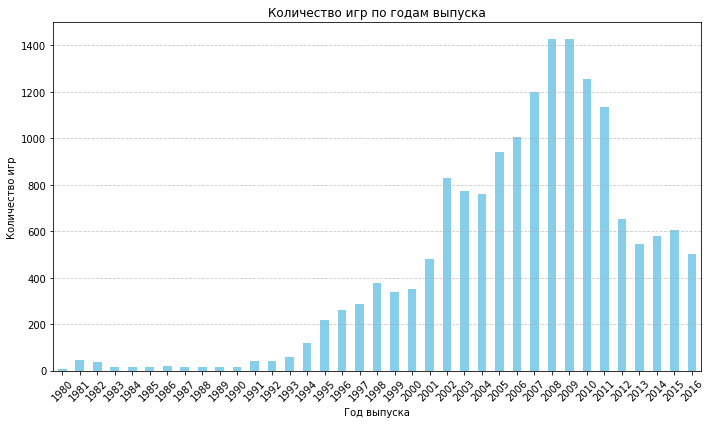

In [16]:
games_by_year = data.groupby('release_year').size()

# Визуализация количества игр по годам
plt.figure(figsize=(10, 6))
games_by_year.plot(kind='bar', color='skyblue')
plt.title('Количество игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Исходя из предоставленных данных о количестве выпущенных игр по годам, можно сделать несколько наблюдений:

В начале 1980-х годов количество выпускаемых игр было довольно невелико, но затем оно стало расти.
Пик выпуска игр приходится на конец 1990-х и начало 2000-х годов, где заметен значительный всплеск в количестве новых игр.
В последующие годы наблюдается некоторый спад в выпуске игр, особенно с 2010 года.
2007 и 2008 годы являются периодом интенсивного роста, возможно, связанного с развитием новых технологий и игровых платформ.

### Изменение продаж по платформам в разные годы.

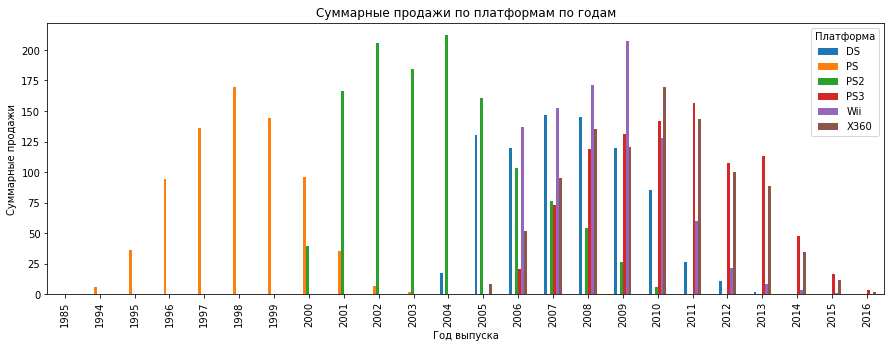

In [17]:
top_platforms = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(6).index
filtered_data = data[data['platform'].isin(top_platforms)]

pivot_table = pd.pivot_table(filtered_data, values='sum_sales', index='release_year', columns='platform', aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(15, 5))
plt.title('Суммарные продажи по платформам по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.show()

На графике видно, что новые платформы появляются примерно каждые 5-7 лет. Например, в 1995 году появились PlayStation, Nintendo 64 и Saturn, в 2000 году - PlayStation 2, Xbox и GameCube, в 2005 году - Nintendo Wii, Xbox 360 и PlayStation 3, в 2010 году - PlayStation Vita, Wii U и Xbox One, в 2015 году - Nintendo Switch и PlayStation 4.

Старые платформы, как правило, исчезают через 5-10 лет после выхода. Например, PlayStation, Nintendo 64 и Saturn вышли в 1995 году и были сняты с производства в 2000, 2002 и 2002 годах соответственно. PlayStation 2, Xbox и GameCube вышли в 2000 году и были сняты с производства в 2013, 2013 и 2007 годах соответственно. Nintendo Wii, Xbox 360 и PlayStation 3 вышли в 2005 году и были сняты с производства в 2017, 2016 и 2017 годах соответственно. Nintendo Vita, Wii U и Xbox One вышли в 2010 году и были сняты с производства в 2019, 2017 и 2020 годах соответственно.

Таким образом, на рынке видеоигр наблюдается цикличность примерно в 10 лет. Каждый цикл начинается с появления новой платформы, которая постепенно завоёвывает популярность и становится доминирующей на рынке. Через 5-10 лет на рынок выходит новая платформа, которая начинает вытеснять предыдущую. Последняя, в свою очередь, постепенно теряет популярность и в конечном итоге снимается с производства.

Конечно, этот цикл не является строго точным. Некоторые платформы могут продержаться на рынке дольше или меньше, чем 10 лет. Например, PlayStation 2 была самой успешной платформой в истории и продержалась на рынке 13 лет. А некоторые платформы, например, Nintendo Wii U, не смогли завоевать популярность и были сняты с производства всего через 7 лет после выхода.

Но в целом, цикличность в 10 лет является характерной чертой рынка видеоигр.

### Определение актуального периода.

In [18]:
interest_period = data.drop(data[(data['release_year'] < 2012)].index)
interest_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3154 non-null   object 
 1   platform      3154 non-null   object 
 2   release_year  2885 non-null   Int64  
 3   genre         3154 non-null   object 
 4   na_sales      3154 non-null   float64
 5   eu_sales      3154 non-null   float64
 6   jp_sales      3154 non-null   float64
 7   other_sales   3154 non-null   float64
 8   critic_score  1465 non-null   float64
 9   user_score    1657 non-null   float64
 10  rating        3154 non-null   object 
 11  sum_sales     3154 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 323.4+ KB


In [19]:
interest_period.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


На основании представленной таблицы с продажами игр по платформам в различные годы, можно выделить актуальный период для анализа, ориентируясь на тенденции роста и спада продаж.

Актуальный период: 2012-2016 г. Обоснование:

Снижение продаж старых платформ: Как видно из данных, продажи на старых платформах (DS, PS, PS2) постепенно уменьшаются и становятся незначительными к 2012 году.

Появление новых платформ: В 2012 году начинается активное продвижение новых платформ (PS4, Xbox One), и их доля продаж растет в последующие годы.

Стабильные лидеры: На протяжении актуального периода видно, что платформы PS3, Xbox 360, и некоторые другие оставались стабильными лидерами в продажах.

Таким образом, фокус на данных за период с 2012 по 2016 годы обоснован для построения прогноза на 2017 год, учитывая снижение значимости старых платформ и рост новых.

### Нахождение лидирующих и потенциально прибыльных платформ.

In [20]:
# Анализ лидирующих платформ по продажам
platform_sales = interest_period.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
print("Лидирующие платформы по продажам:")
print(platform_sales)

Лидирующие платформы по продажам:
platform
PS4     314.14
PS3     297.09
X360    246.72
3DS     195.80
XOne    159.32
WiiU     82.19
PC       66.41
Wii      51.70
PSV      49.44
PS2      22.21
DS       15.89
PSP      15.71
2600     10.50
XB        6.17
GBA       4.97
PS        3.28
GC        2.20
GB        1.03
N64       0.67
Name: sum_sales, dtype: float64


In [21]:
platform_absolute_growth = platform_sales / platform_sales.shift(fill_value=0) - 1
top_growth_platforms = platform_absolute_growth.sort_values(ascending=False).head(3).index.tolist()
print("\nПлатформы с наибольшим абсолютным ростом продаж:")
print(top_growth_platforms)


Платформы с наибольшим абсолютным ростом продаж:
['PS4', 'PSP', 'PSV']


In [22]:
platform_sales_mean = interest_period.groupby('platform')['sum_sales'].mean()
platform_growth = platform_sales_mean / platform_sales_mean.shift(-1) - 1
platform_growth = platform_growth.dropna().sort_values(ascending=False)
top_platforms_by_growth = platform_growth.head(3).index.tolist()
print("Платформы с наибольшим относительным ростом продаж:")
print(platform_growth)

Платформы с наибольшим относительным ростом продаж:
platform
PS4     8.641016
GBA     1.875207
X360    1.607850
GB      1.279678
3DS     0.860532
2600    0.274410
PS2     0.136769
Wii     0.050767
N64    -0.102093
WiiU   -0.270285
PS     -0.282691
PS3    -0.282932
GC     -0.296375
PSP    -0.307319
PC     -0.469181
XB     -0.544496
DS     -0.747095
PSV    -0.795745
Name: sum_sales, dtype: float64


In [23]:
combined_growth = (1 + platform_absolute_growth) * (1 + platform_growth) - 1
top_combined_platforms = combined_growth.sort_values(ascending=False).head(3).index.tolist()
print("Потенциально прибыльные платформы:")
print(top_combined_platforms)

Потенциально прибыльные платформы:
['PS4', 'GBA', 'X360']


Лидирующие платформы по продажам:
Основная метрика - суммарные продажи. Эта метрика важна для выявления платформ с наибольшей коммерческой успешностью. В данном случае, PS4, PS3 и X360 показывают самые высокие общие продажи, что может быть интерпретировано как высокая популярность этих платформ среди потребителей.

Платформы с наибольшим абсолютным ростом продаж:
Дополнительный анализ включает в себя абсолютный рост продаж. Этот показатель дает представление о том, как меняются продажи во времени. PS4, PSP и PSV выделяются среди платформ с самым значительным абсолютным ростом. Это может быть связано с выпуском новых игр, обновлением платформ или другими факторами, которые стимулируют спрос.

Платформы с наибольшим относительным ростом продаж:
Относительный рост продаж учитывает средние продажи платформы и выявляет тенденции в её динамике. PS4, GBA и X360 имеют наибольший относительный рост, что означает, что эти платформы не только обеспечивают высокие общие продажи, но и демонстрируют стабильное увеличение продаж со временем.

Потенциально прибыльные платформы:
Комбинированный подход, учитывающий как абсолютный, так и относительный рост, помогает выделить потенциально прибыльные платформы. PS4, GBA и X360 выбраны как такие платформы. Такой выбор обоснован тем, что эти платформы не только успешны по общим продажам, но и демонстрируют тенденцию к постоянному увеличению спроса, что может быть ключевым фактором для инвесторов и разработчиков.



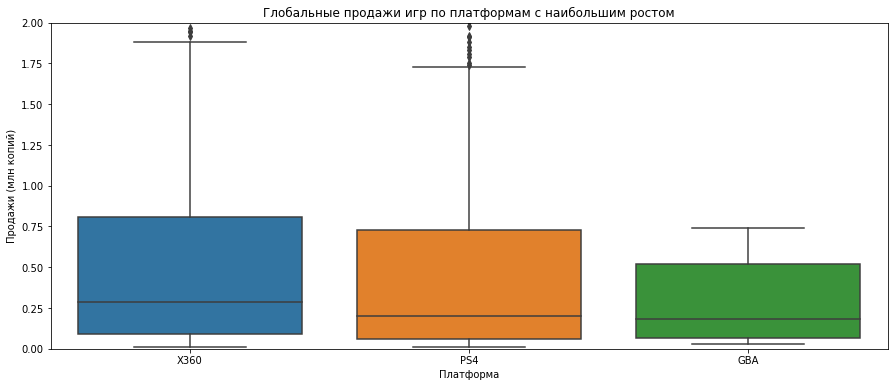

In [24]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='platform', y='sum_sales', data=interest_period[interest_period['platform'].isin(top_platforms_by_growth)])
plt.title('Глобальные продажи игр по платформам с наибольшим ростом')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн копий)')
plt.ylim(0, 2)  
plt.show()

Анализ "ящика с усами" для глобальных продаж игр на платформах PS4, X360 и GBA позволяет выделить различия в распределении продаж между этими платформами. PS4 и X360 имеют схожие медианные значения продаж (около 0.2 и 0.28 миллиона копий соответственно) и сопоставимые интерквартильные размахи. Обе платформы также демонстрируют наличие выбросов с высокими значениями продаж. С другой стороны, GBA характеризуется более низкой медианой (примерно 0.16 миллиона копий), но также обнаруживает наличие выбросов с более высокими продажами. Это может указывать на неоднородность в данных для GBA, где несколько игр продались на уровне, характерном для более крупных платформ.

### Анализ влияния оценки пользователей и критиков на продажи платформы 

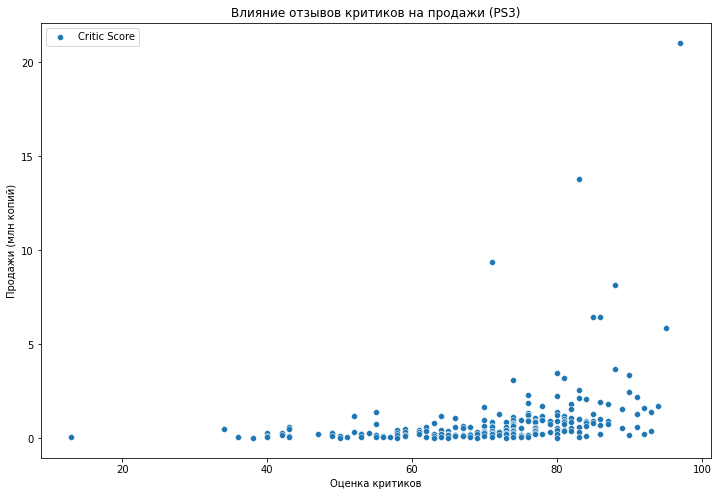

In [25]:
ps3_data = interest_period[interest_period['platform'] == 'PS3']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', y='sum_sales', data=ps3_data, label='Critic Score')
plt.title('Влияние отзывов критиков на продажи (PS3)')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи (млн копий)')
plt.show()

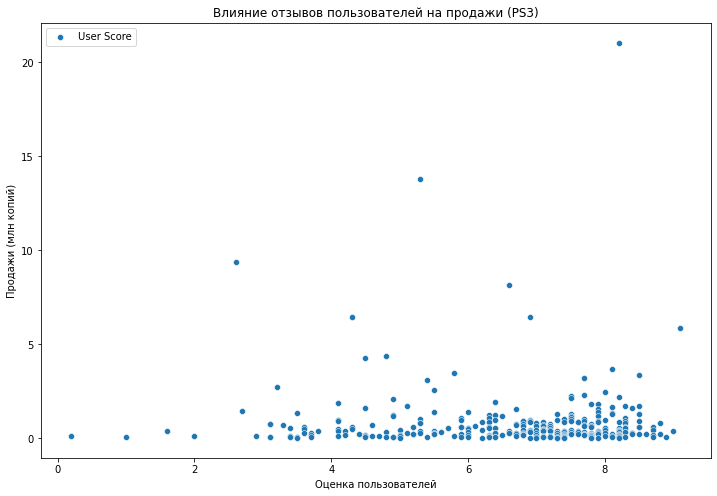

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', y='sum_sales', data=ps3_data, label='User Score')
plt.title('Влияние отзывов пользователей на продажи (PS3)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи (млн копий)')
plt.show()

In [27]:
platforms = interest_period['platform'].unique()

for platform in platforms:
    platform_data = interest_period[interest_period['platform'] == platform]

    correlation_critic = platform_data['critic_score'].corr(platform_data['sum_sales'])
    correlation_user = platform_data['user_score'].astype(float).corr(platform_data['sum_sales'])
    
    print(f"Платформа: {platform}")
    print(f"Корреляция между отзывами критиков и продажами: {correlation_critic}")
    print(f"Корреляция между отзывами пользователей и продажами: {correlation_user}")
    print("--------")

Платформа: PS3
Корреляция между отзывами критиков и продажами: 0.33451355035559455
Корреляция между отзывами пользователей и продажами: -0.007980185727574007
--------
Платформа: X360
Корреляция между отзывами критиков и продажами: 0.36811788816144275
Корреляция между отзывами пользователей и продажами: 0.005916643352759989
--------
Платформа: PS4
Корреляция между отзывами критиков и продажами: 0.40656790206178095
Корреляция между отзывами пользователей и продажами: -0.031957110204556376
--------
Платформа: 3DS
Корреляция между отзывами критиков и продажами: 0.323378043752059
Корреляция между отзывами пользователей и продажами: 0.20373479097542724
--------
Платформа: DS
Корреляция между отзывами критиков и продажами: 0.5850917296831808
Корреляция между отзывами пользователей и продажами: 0.43795618053444174
--------
Платформа: XOne
Корреляция между отзывами критиков и продажами: 0.4169983280084017
Корреляция между отзывами пользователей и продажами: -0.06892505328279414
--------
Платфор

Отзывы критиков (PS3):
* График рассеяния: Визуально видно, что с увеличением оценок критиков растут и глобальные продажи игр.
* Корреляция: Коэффициент корреляции между оценками критиков и продажами составляет приблизительно 0.33. Это указывает на слабую положительную корреляцию, что означает, что у игр с более высокими оценками критиков склонность к более высоким продажам.

Отзывы пользователей (PS3):
* График рассеяния: В данном случае, визуальная связь между оценками пользователей и продажами не так явно выражена, и точки на графике более равномерно распределены.
* Корреляция: Коэффициент корреляции между оценками пользователей и продажами составляет приблизительно -0.008. Это близко к нулю и указывает на отсутствие четкой линейной связи между оценками пользователей и продажами.

Общие тенденции показывают, что отзывы критиков чаще всего имеют положительную корреляцию с продажами, но эта связь может быть как более сильной (например, PS4, XOne), так и менее выраженной (например, PC, PSV).
Отзывы пользователей часто имеют меньшую корреляцию с продажами, и в некоторых случаях эта связь даже может быть отрицательной (например, GBA, PS4, XOne).
Важно отметить, что корреляция не обязательно означает причинно-следственную связь, и различия в корреляциях могут зависеть от особенностей каждой платформы и рынка.

### Определение 

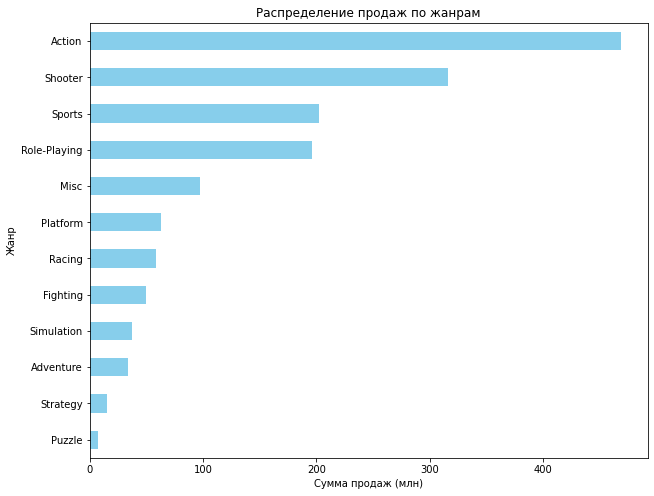

In [28]:
genre_sales = interest_period.groupby('genre')['sum_sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
genre_sales.plot(kind='barh', color='skyblue')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Сумма продаж (млн)')
plt.ylabel('Жанр')
plt.show()

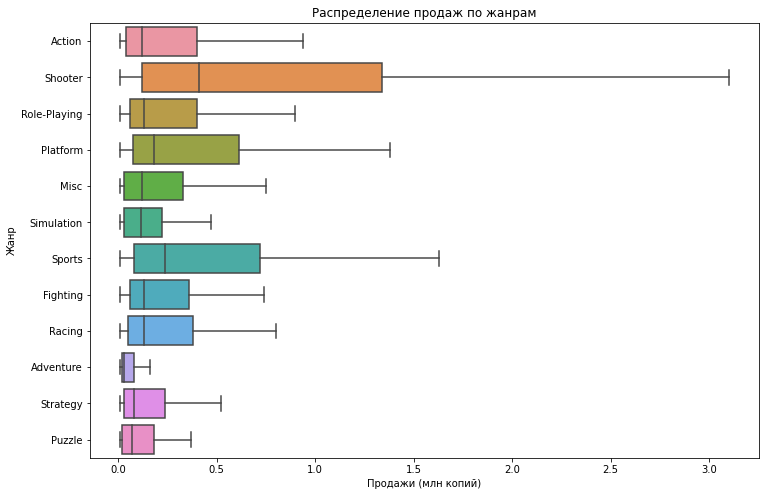

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='sum_sales', y='genre', data=interest_period, showfliers=False)
plt.title('Распределение продаж по жанрам')
plt.xlabel('Продажи (млн копий)')
plt.ylabel('Жанр')
plt.show()

График "ящик с усами" по продажам игр в разрезе жанров демонстрирует существенные различия в распределении продаж между разными жанрами.

Медианные продажи: Shooter, Sports и Platform выделяются более высокими медианными продажами, указывая на то, что в этих жанрах многие игры достигают значительного коммерческого успеха.

Размах продаж: Shooter и Sports имеют более широкий размах значений, что свидетельствует о наличии как игр с невероятно высокими продажами, так и тех, у которых продажи ниже среднего. В отличие от этого, у Puzzle, Strategy и Advanture размах значений сужен, что может указывать на более узкую популярность этих жанров среди игроков.

Общий тренд: График подчеркивает, что существует разнообразие в успешности игр разных жанров, и наиболее успешные жанры можно выделить по высоким медианным продажам и широкому размаху значений.

In [30]:
print('Общие продажи по жанрам:', genre_sales)

genre_sales_mean = interest_period.groupby('genre')['sum_sales'].mean().sort_values(ascending=True)
print('\nСредние продажи по жанрам:', genre_sales_mean)

genre_sales_median = interest_period.groupby('genre')['sum_sales'].median().sort_values(ascending=True)
print('\nМедианные продажи по жанрам:', genre_sales_median)

Общие продажи по жанрам: genre
Puzzle            7.57
Strategy         15.00
Adventure        33.69
Simulation       37.13
Fighting         49.36
Racing           58.68
Platform         63.22
Misc             97.26
Role-Playing    196.28
Sports          202.66
Shooter         315.82
Action          468.77
Name: sum_sales, dtype: float64

Средние продажи по жанрам: genre
Adventure       0.107981
Strategy        0.185185
Puzzle          0.194103
Simulation      0.386771
Fighting        0.407934
Racing          0.425217
Action          0.428884
Misc            0.440090
Role-Playing    0.507183
Sports          0.655858
Platform        0.665474
Shooter         1.205420
Name: sum_sales, dtype: float64

Медианные продажи по жанрам: genre
Adventure       0.030
Puzzle          0.070
Strategy        0.080
Simulation      0.115
Misc            0.120
Action          0.120
Fighting        0.130
Racing          0.130
Role-Playing    0.130
Platform        0.180
Sports          0.240
Shooter         0

Самые прибыльные жанры:

Action и Shooter: Эти два жанра лидируют по общим продажам, превышая суммарные продажи других жанров. Shooter выделяется наибольшими продажами с общей суммой в 315.82 миллиона копий, в то время как Action следует за ним с суммарными продажами в 468.77 миллиона копий.

Sports и Role-Playing: Также в числе прибыльных жанров. Sports имеет общие продажи в размере 202.66 миллиона копий, в то время как Role-Playing оказывается на третьем месте с суммой в 196.28 миллиона копий.

Жанры с высокими и низкими продажами:

Низкие продажи: Puzzle и Strategy - эти жанры имеют наименьшие общие продажи с суммами 7.57 миллиона и 15.00 миллиона копий соответственно.

Высокие продажи: Action и Shooter оказываются наиболее успешными с высокими общими продажами, превышающими другие жанры.

Средние и медианные продажи:

Средние продажи: Жанры Shooter, Sports и Platform выделяются среди прочих по средним продажам. Shooter имеет самые высокие средние продажи (1.21 миллиона копий), Sports и Platform также показывают хорошие результаты со средними продажами в 0.66 и 0.67 миллиона копий соответственно.

Медианные продажи: Adventure, Puzzle и Strategy имеют наименьшие медианные продажи, что может свидетельствовать о более широком разбросе значений в этих жанрах. В то время как Action, Shooter и Role-Playing демонстрируют более высокие медианные продажи, что может указывать на более стабильные результаты в этих категориях.


# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [31]:
# Самые популярные платформы (топ-5) в каждом регионе
na_platforms = interest_period.groupby('platform')['na_sales'].sum().nlargest(5)
eu_platforms = interest_period.groupby('platform')['eu_sales'].sum().nlargest(5)
jp_platforms = interest_period.groupby('platform')['jp_sales'].sum().nlargest(5)

# Вывод результатов
print("Самые популярные платформы в Северной Америке:\n", na_platforms)
print("\nСамые популярные платформы в Европе:\n", eu_platforms)
print("\nСамые популярные платформы в Японии:\n", jp_platforms)

Самые популярные платформы в Северной Америке:
 platform
X360    146.78
PS4     108.74
PS3     106.74
XOne     93.12
3DS      56.15
Name: na_sales, dtype: float64

Самые популярные платформы в Европе:
 platform
PS4     141.09
PS3     109.93
X360     76.96
XOne     51.59
3DS      42.85
Name: eu_sales, dtype: float64

Самые популярные платформы в Японии:
 platform
3DS     87.84
PS3     36.07
PSV     21.11
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


In [32]:
# Самые популярные жанры (топ-5) в каждом регионе
na_genres = interest_period.groupby('genre')['na_sales'].sum().nlargest(5)
eu_genres = interest_period.groupby('genre')['eu_sales'].sum().nlargest(5)
jp_genres = interest_period.groupby('genre')['jp_sales'].sum().nlargest(5)

print("Самые популярные жанры в Северной Америке:\n", na_genres)
print("\nСамые популярные жанры в Европе:\n", eu_genres)
print("\nСамые популярные жанры в Японии:\n", jp_genres)

Самые популярные жанры в Северной Америке:
 genre
Action          193.68
Shooter         152.18
Sports           94.76
Role-Playing     64.77
Misc             45.89
Name: na_sales, dtype: float64

Самые популярные жанры в Европе:
 genre
Action          167.48
Shooter         116.29
Sports           74.54
Role-Playing     49.00
Racing           29.31
Name: eu_sales, dtype: float64

Самые популярные жанры в Японии:
 genre
Role-Playing    67.46
Action          54.09
Misc            13.95
Simulation      10.57
Fighting         9.64
Name: jp_sales, dtype: float64


In [33]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
na_esrb_sales = interest_period.groupby('rating')['na_sales'].sum()
eu_esrb_sales = interest_period.groupby('rating')['eu_sales'].sum()
jp_esrb_sales = interest_period.groupby('rating')['jp_sales'].sum()

print("\nПродажи в Северной Америке по рейтингу ESRB:\n", na_esrb_sales)
print("\nПродажи в Европе по рейтингу ESRB:\n", eu_esrb_sales)
print("\nПродажи в Японии по рейтингу ESRB:\n", jp_esrb_sales)


Продажи в Северной Америке по рейтингу ESRB:
 rating
E          133.12
E10+        83.52
M          237.16
RP           0.00
T           78.17
Unknown    118.15
Name: na_sales, dtype: float64

Продажи в Европе по рейтингу ESRB:
 rating
E          119.40
E10+        60.54
M          197.93
RP           0.05
T           58.20
Unknown     95.15
Name: eu_sales, dtype: float64

Продажи в Японии по рейтингу ESRB:
 rating
E           28.48
E10+         8.19
M           21.86
RP           0.00
T           26.72
Unknown    114.03
Name: jp_sales, dtype: float64


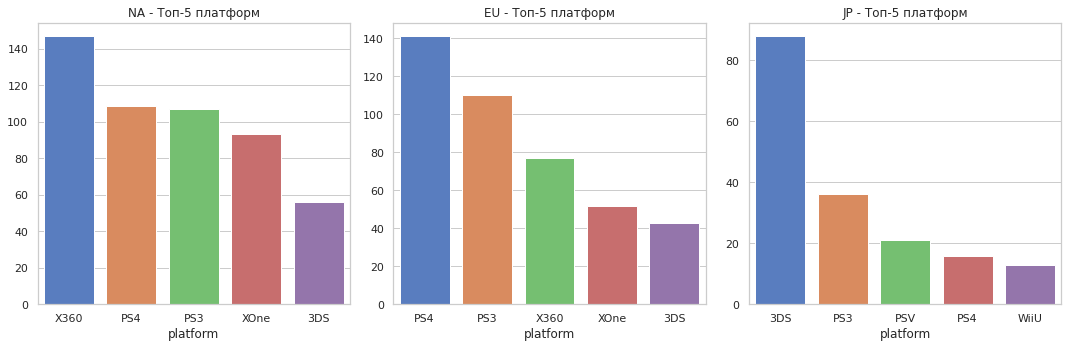

In [34]:
sns.set(style="whitegrid")
# Визуализация самых популярных платформ
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=na_platforms.index, y=na_platforms.values, palette="muted")
plt.title('NA - Топ-5 платформ')
plt.subplot(1, 3, 2)
sns.barplot(x=eu_platforms.index, y=eu_platforms.values, palette="muted")
plt.title('EU - Топ-5 платформ')
plt.subplot(1, 3, 3)
sns.barplot(x=jp_platforms.index, y=jp_platforms.values, palette="muted")
plt.title('JP - Топ-5 платформ')
plt.tight_layout()
plt.show()

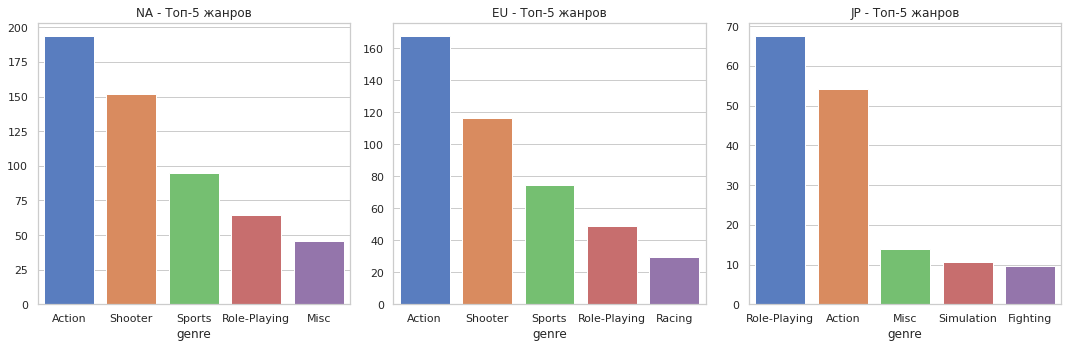

In [35]:
# Визуализация самых популярных жанров
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=na_genres.index, y=na_genres.values, palette="muted")
plt.title('NA - Топ-5 жанров')
plt.subplot(1, 3, 2)
sns.barplot(x=eu_genres.index, y=eu_genres.values, palette="muted")
plt.title('EU - Топ-5 жанров')
plt.subplot(1, 3, 3)
sns.barplot(x=jp_genres.index, y=jp_genres.values, palette="muted")
plt.title('JP - Топ-5 жанров')
plt.tight_layout()
plt.show()

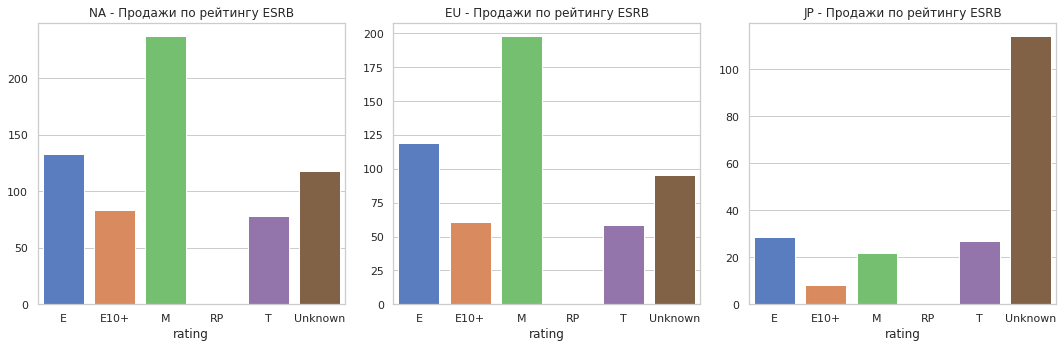

In [36]:
# Визуализация влияния рейтинга ESRB на продажи
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=na_esrb_sales.index, y=na_esrb_sales.values, palette="muted")
plt.title('NA - Продажи по рейтингу ESRB')
plt.subplot(1, 3, 2)
sns.barplot(x=eu_esrb_sales.index, y=eu_esrb_sales.values, palette="muted")
plt.title('EU - Продажи по рейтингу ESRB')
plt.subplot(1, 3, 3)
sns.barplot(x=jp_esrb_sales.index, y=jp_esrb_sales.values, palette="muted")
plt.title('JP - Продажи по рейтингу ESRB')
plt.tight_layout()
plt.show()

Исходя из предоставленных данных о продажах видеоигр в различных регионах (Северная Америка, Европа, Япония), можно выделить несколько ключевых тенденций.

Популярные платформы:

В Северной Америке наиболее популярными платформами являются Xbox 360, PlayStation 2 и Wii. В Европе лидируют PlayStation 2, PlayStation 3 и Xbox 360, в то время как в Японии на вершине списка DS, PlayStation и PlayStation 2. Различия в долях продаж указывают на предпочтения игроков в зависимости от региона.

Популярные жанры:

В Северной Америке наиболее востребованными жанрами являются Action, Sports и Shooter, в Европе - Action, Sports и Shooter, а в Японии - Role-Playing, Action и Sports. Эти различия могут отражать культурные предпочтения и вкусы разных аудиторий.

Влияние рейтинга ESRB:

Рейтинг ESRB имеет влияние на продажи в разных регионах. В Северной Америке и Европе игры с рейтингом "E" (Everyone) преобладают в общих продажах, в Японии же лидируют игры с рейтингом "Unknown". Возможно, в Японии меньше придается внимание оценкам ESRB, или существует своя система рейтингов.


# Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.
* Поясните: Как вы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [37]:
alpha = 0.05

xbox_one_rating = interest_period[interest_period['platform'] == 'XOne']['user_score'].dropna()

pc_rating = interest_period[interest_period['platform'] == 'PC']['user_score'].dropna()

results = st.ttest_ind(xbox_one_rating, pc_rating)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, пользовательские рейтинги платформ Xbox One и PC не равны')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.6881350504357912
Нет оснований отвергнуть нулевую гипотезу


Проведенный t-тест для сравнения средних пользовательских рейтингов платформ Xbox One и PC не позволяет отвергнуть нулевую гипотезу о равенстве средних. Полученное p-value равно 0.6881, что выше уровня значимости alpha (0.05). Таким образом, нет оснований считать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [38]:
alpha = 0.05

action_genre_rating = interest_period[interest_period['genre'] == 'Action']['user_score'].dropna()

sports_genre_rating = interest_period[interest_period['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(action_genre_rating, sports_genre_rating, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги не равны.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги равны.")

p-value: 2.5559532467428057e-16
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги не равны.


В отличие от платформ, t-тест для сравнения средних пользовательских рейтингов жанров Action и Sports позволяет отвергнуть нулевую гипотезу о их равенстве. Полученное p-value очень мало (порядка 2.56e-16), что значительно меньше уровня значимости alpha. Таким образом, есть основания считать, что средние пользовательские рейтинги для жанров Action и Sports различаются.


# Шаг 6. Напишите общий вывод

Общий вывод:

Динамика выпуска игр: На основе предоставленных данных видно, что индустрия видеоигр в целом развивалась с небольшими колебаниями в течение десятилетий. Заметен пик в конце 1990-х и начале 2000-х годов, возможно, связанный с развитием новых технологий и игровых платформ. С 2010 года наблюдается некоторый спад в выпуске игр.

Цикличность рынка: Рынок видеоигр подчиняется циклу, который включает в себя появление новых платформ, их расцвет и угасание. Периодически появляются успешные платформы, заменяя предыдущие, и этот цикл продолжается каждые 5-7 лет.

Анализ актуального периода: Выбранный актуальный период для анализа с 2012 по 2016 годы обоснован снижением продаж старых платформ, появлением новых и стабильностью лидеров. Этот период представляет интерес для прогнозирования на 2017 год.

Лидирующие платформы: PS4, PS3 и X360 выделяются как лидеры по общим продажам. PS4, PSP и PSV имеют значительный абсолютный рост, а PS4, GBA и X360 - высокий относительный рост, что делает их потенциально прибыльными.

Анализ "ящика с усами": Продажи игр на PS4 и X360 имеют схожие распределения, в то время как GBA выделяется менее высокой медианой и наличием выбросов с более высокими продажами.

Корреляция отзывов и продаж: Отзывы критиков чаще всего коррелируют с продажами, в то время как связь с отзывами пользователей может быть менее выраженной. Корреляция не всегда означает причинно-следственную связь, и различия зависят от платформы и рынка.

Жанры и продажи: Shooter, Sports и Platform выделяются высокими медианными продажами. Жанры с более широким размахом, такие как Shooter и Sports, показывают большую вариативность в продажах.

Самые успешные жанры: Action и Shooter лидируют по общим продажам, в то время как Puzzle и Strategy имеют наименьшие продажи. Shooter, Sports и Platform выделяются как жанры с самыми высокими средними и медианными продажами.

Предпочтения в разных регионах: Популярные платформы и жанры различаются в Северной Америке, Европе и Японии, что указывает на культурные предпочтения аудиторий. Влияние рейтинга ESRB также различно в разных регионах.

**Рекомендации:**

На основе проведенного анализа данных о видеоигровой индустрии, можно предложить несколько рекомендаций для инвесторов и разработчиков. С учетом цикличности рынка, рекомендуется внимательно следить за появлением новых игровых платформ и технологий, а также оценивать их потенциал на основе предыдущих циклов развития индустрии.

Для разработчиков игр важно обратить внимание на популярность жанров с высокими медианными продажами, таких как Shooter, Sports и Platform. Также стоит учитывать различия в предпочтениях аудиторий в разных регионах, чтобы адаптировать контент под культурные особенности рынка.

Инвесторам рекомендуется обращать внимание на лидирующие платформы с высокими общими продажами, такие как PS4, PS3 и X360, а также те, которые демонстрируют значительный абсолютный и относительный рост, например, PS4, PSP и PSV. Эти платформы могут представлять собой потенциально прибыльные объекты вложений.

С учетом влияния отзывов на продажи, как критиков, так и пользователей, рекомендуется разработчикам стремиться к созданию качественного контента, который будет положительно воспринят целевой аудиторией. Тем не менее, необходимо помнить, что корреляция не всегда означает причинно-следственную связь, и уникальные особенности каждой платформы могут влиять на этот взаимосвязанный эффект.